<a href="https://colab.research.google.com/github/SanjayNSanju/Flower-Recognition/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
(i_train, o_train), (i_test, o_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
print(i_train.shape)
print(i_test.shape)

(60000, 28, 28)
(10000, 28, 28)


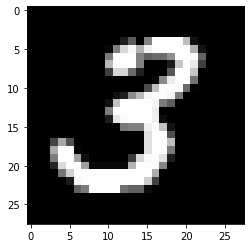

In [ ]:

i = 255
plt.imshow(i_train[i],cmap='gray')
plt.show()

In [ ]:
o_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
i_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
i_train = i_train/255
i_test = i_test/255

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = i_train[0].shape))
model.add(tf.keras.layers.Dense(784,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.fit(i_train,o_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1904 - accuracy: 0.9434
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0757 - accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0482 - accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0355 - accuracy: 0.9885
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0267 - accuracy: 0.9911


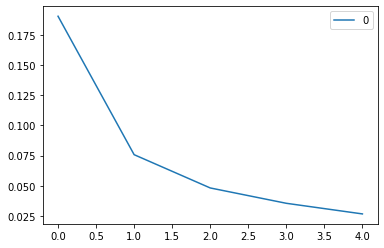

In [ ]:

loss = pd.DataFrame(model.history.history['loss']).plot()

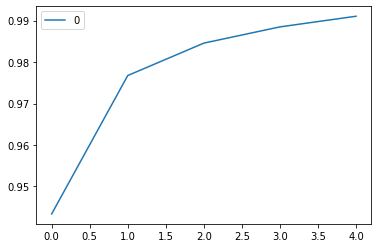

In [ ]:
acc = pd.DataFrame(model.history.history['accuracy']).plot()

In [ ]:
type(i_test)

numpy.ndarray

In [ ]:
o_pred = model.predict(i_test)
o_pred = np.argmax(o_pred,axis=1)
o_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
accuracy_score(o_test,o_pred)

0.9774

In [ ]:
model.save('Digit_Reconizer..hdf5')

[7]


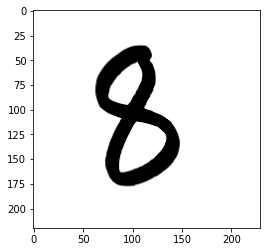

In [ ]:
import cv2

img =  cv2.imread('/content/hw8.png',1)
plt.imshow(img)
re_img = cv2.resize(img.astype('uint8'),(28,28))
img_grey = cv2.cvtColor(re_img,cv2.COLOR_BGR2GRAY)
img_grey = img_grey/255
out = model.predict(img_grey.reshape(1,28,28))
print(np.argmax(out,axis=1))